In [1]:
# import libraries
import pandas as pd
import numpy as np
import time
import re
from textblob import TextBlob
from datetime import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the CSV file containing the tweets into a pandas DataFrame
tweets_df = pd.read_csv(r"C:\Users\USER\Downloads\twitter_data_2.csv")

#show the dataframe
tweets_df

,Date Created,Number of Likes,Source of Tweet,Tweet,Location,Number of Retweets,#hashtags
0,2023-02-27 03:01:37+00:00,41194,Twitter for iPhone,is there any other way to be? https://t.co/P0n...,NaN,3181,"{'hashtags': [], 'symbols': [], 'user_mentions..."
1,2023-01-06 23:48:42+00:00,19234,Twitter Web App,I prefer screams of agony. https://t.co/UDwZsk...,NaN,926,"{'hashtags': [], 'symbols': [], 'user_mentions..."
2,2023-01-06 17:00:31+00:00,133591,Twitter Media Studio,More torture is coming. Lucky you. https://t.c...,NaN,22806,"{'hashtags': [], 'symbols': [], 'user_mentions..."
3,2023-01-06 03:53:50+00:00,123,Twitter for iPhone,@SMediaProd01 @netflix Indeed,NaN,0,"{'hashtags': [], 'symbols': [], 'user_mentions..."
4,2023-01-03 19:45:48+00:00,16833,Twitter Web App,Your daughters are correct. As the saying goes...,NaN,673,"{'hashtags': [], 'symbols': [], 'user_mentions..."
...,...,...,...,...,...,...,...
85,2022-06-01 17:28:41+00:00,854,Twitter Web App,"Whenever I need to relax, I simply spend a few...",NaN,64,"{'hashtags': [], 'symbols': [], 'user_mentions..."
86,2022-06-01 17:25:08+00:00,656,Twitter Web App,I see what you did there. https://t.co/kapipnlSgs,NaN,36,"{'hashtags': [], 'symbols': [], 'user_mentions..."
87,2022-06-01 17:10:14+00:00,1001,Twitter Web App,I would feel gratitude but I’m dead inside. ht...,NaN,99,"{'hashtags': [], 'symbols': [], 'user_mentions..."
88,2022-06-01 16:55:00+00:00,6695,Twitter Media Studio,Enjoy this marketing ploy. https://t.co/RBgB7T...,NaN,1552,"{'hashtags': [], 'symbols': [], 'user_mentions..."


In [60]:
pd.set_option('display.max_row', None)

In [61]:
# delete empty columns
tweet = tweets_df.drop(['Location', '#hashtags'], axis=1)

#show the dataframe
tweet

,Date Created,Number of Likes,Source of Tweet,Tweet,Number of Retweets
0,2023-02-27 03:01:37+00:00,41194,Twitter for iPhone,is there any other way to be? https://t.co/P0n...,3181
1,2023-01-06 23:48:42+00:00,19234,Twitter Web App,I prefer screams of agony. https://t.co/UDwZsk...,926
2,2023-01-06 17:00:31+00:00,133591,Twitter Media Studio,More torture is coming. Lucky you. https://t.c...,22806
3,2023-01-06 03:53:50+00:00,123,Twitter for iPhone,@SMediaProd01 @netflix Indeed,0
4,2023-01-03 19:45:48+00:00,16833,Twitter Web App,Your daughters are correct. As the saying goes...,673
5,2022-12-07 21:58:14+00:00,25519,Twitter Web App,https://t.co/0t5UQJlj1w https://t.co/b2mwPWPG8e,1797
6,2022-12-04 22:22:43+00:00,8598,Twitter for iPhone,@xnanailyana I started this account because Th...,888
7,2022-12-04 20:29:06+00:00,6980,Twitter for iPhone,"Coincidentally, bend and snap is also the most...",451
8,2022-12-04 18:00:00+00:00,21749,Twitter Media Studio,Eugene is looking for new recruits to join the...,4724
9,2022-12-03 18:00:01+00:00,18842,Twitter Media Studio,I love to start my weekends with a good blood ...,1628


In [62]:
tweet['year'] = tweet['Date Created'].str.extract(pat = '([0-9]{4})').astype(int)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

#show the dataframe
tweet

,Date Created,Number of Likes,Source of Tweet,Tweet,Number of Retweets,year
0,2023-02-27 03:01:37+00:00,41194,Twitter for iPhone,is there any other way to be? https://t.co/P0n...,3181,2023
1,2023-01-06 23:48:42+00:00,19234,Twitter Web App,I prefer screams of agony. https://t.co/UDwZsk...,926,2023
2,2023-01-06 17:00:31+00:00,133591,Twitter Media Studio,More torture is coming. Lucky you. https://t.c...,22806,2023
3,2023-01-06 03:53:50+00:00,123,Twitter for iPhone,@SMediaProd01 @netflix Indeed,0,2023
4,2023-01-03 19:45:48+00:00,16833,Twitter Web App,Your daughters are correct. As the saying goes...,673,2023
5,2022-12-07 21:58:14+00:00,25519,Twitter Web App,https://t.co/0t5UQJlj1w https://t.co/b2mwPWPG8e,1797,2022
6,2022-12-04 22:22:43+00:00,8598,Twitter for iPhone,@xnanailyana I started this account because Th...,888,2022
7,2022-12-04 20:29:06+00:00,6980,Twitter for iPhone,"Coincidentally, bend and snap is also the most...",451,2022
8,2022-12-04 18:00:00+00:00,21749,Twitter Media Studio,Eugene is looking for new recruits to join the...,4724,2022
9,2022-12-03 18:00:01+00:00,18842,Twitter Media Studio,I love to start my weekends with a good blood ...,1628,2022


In [63]:
tweet['Date Created'] = pd.to_datetime(tweet['Date Created'])
tweet['Date Created'] = tweet['Date Created'].dt.strftime('%Y-%m-%d')

#show the dataframe
tweet.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Number of Retweets,year
0,2023-02-27,41194,Twitter for iPhone,is there any other way to be? https://t.co/P0n...,3181,2023
1,2023-01-06,19234,Twitter Web App,I prefer screams of agony. https://t.co/UDwZsk...,926,2023
2,2023-01-06,133591,Twitter Media Studio,More torture is coming. Lucky you. https://t.c...,22806,2023
3,2023-01-06,123,Twitter for iPhone,@SMediaProd01 @netflix Indeed,0,2023
4,2023-01-03,16833,Twitter Web App,Your daughters are correct. As the saying goes...,673,2023


In [64]:
#cleaning the data
def clean(clean_tweet):
    clean_tweet =re.sub(r'@[A-Za-z0-9]+', '', clean_tweet)
    clean_tweet =re.sub(r'#', '', clean_tweet)
    clean_tweet =re.sub(r'RT[\s]+', '', clean_tweet)
    clean_tweet =re.sub(r'https?:\/\/\S+', '', clean_tweet)
    return clean_tweet
tweet['Tweet'] = tweet['Tweet'].apply(clean)

#show the dataframe
tweet

,Date Created,Number of Likes,Source of Tweet,Tweet,Number of Retweets,year
0,2023-02-27,41194,Twitter for iPhone,is there any other way to be?,3181,2023
1,2023-01-06,19234,Twitter Web App,I prefer screams of agony.,926,2023
2,2023-01-06,133591,Twitter Media Studio,More torture is coming. Lucky you.,22806,2023
3,2023-01-06,123,Twitter for iPhone,Indeed,0,2023
4,2023-01-03,16833,Twitter Web App,Your daughters are correct. As the saying goes...,673,2023
5,2022-12-07,25519,Twitter Web App,,1797,2022
6,2022-12-04,8598,Twitter for iPhone,I started this account because Thing told me ...,888,2022
7,2022-12-04,6980,Twitter for iPhone,"Coincidentally, bend and snap is also the most...",451,2022
8,2022-12-04,21749,Twitter Media Studio,Eugene is looking for new recruits to join the...,4724,2022
9,2022-12-03,18842,Twitter Media Studio,I love to start my weekends with a good blood ...,1628,2022


In [65]:
#  Define a function to classify the polarity of each tweet using TextBlob
def classify_sentiment(tweet):
    blob = TextBlob(tweet)
    if blob.sentiment.polarity > 0:
        return 'Positive'
    elif blob.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classify_sentiment function to each tweet in the DataFrame
tweet['sentiment'] = tweet['Tweet'].apply(classify_sentiment)

# Filter the DataFrame to get only the positive or negative tweets
positive_tweets = tweet[tweet['sentiment'] == 'Positive']
negative_tweets = tweet[tweet['sentiment'] == 'Negative']

#show the dataframe
tweet

,Date Created,Number of Likes,Source of Tweet,Tweet,Number of Retweets,year,sentiment
0,2023-02-27,41194,Twitter for iPhone,is there any other way to be?,3181,2023,Negative
1,2023-01-06,19234,Twitter Web App,I prefer screams of agony.,926,2023,Neutral
2,2023-01-06,133591,Twitter Media Studio,More torture is coming. Lucky you.,22806,2023,Positive
3,2023-01-06,123,Twitter for iPhone,Indeed,0,2023,Neutral
4,2023-01-03,16833,Twitter Web App,Your daughters are correct. As the saying goes...,673,2023,Positive
5,2022-12-07,25519,Twitter Web App,,1797,2022,Neutral
6,2022-12-04,8598,Twitter for iPhone,I started this account because Thing told me ...,888,2022,Positive
7,2022-12-04,6980,Twitter for iPhone,"Coincidentally, bend and snap is also the most...",451,2022,Positive
8,2022-12-04,21749,Twitter Media Studio,Eugene is looking for new recruits to join the...,4724,2022,Positive
9,2022-12-03,18842,Twitter Media Studio,I love to start my weekends with a good blood ...,1628,2022,Positive


In [66]:
#creating a function to get tweet subjectivity
def getSubjectivity(clean_tweet):
    return TextBlob(clean_tweet).sentiment.subjectivity

# function to get tweet polarity
def getPolarity(clean_tweet):
    return TextBlob(clean_tweet).sentiment.polarity

#creat columns
tweet['Subjectivity'] = tweet['Tweet'].apply(getSubjectivity)
tweet['Polarity'] = tweet['Tweet'].apply(getPolarity)

#show the dataframe
tweet

,Date Created,Number of Likes,Source of Tweet,Tweet,Number of Retweets,year,sentiment,Subjectivity,Polarity
0,2023-02-27,41194,Twitter for iPhone,is there any other way to be?,3181,2023,Negative,0.37500,-0.12500
1,2023-01-06,19234,Twitter Web App,I prefer screams of agony.,926,2023,Neutral,0.00000,0.00000
2,2023-01-06,133591,Twitter Media Studio,More torture is coming. Lucky you.,22806,2023,Positive,0.66667,0.41667
3,2023-01-06,123,Twitter for iPhone,Indeed,0,2023,Neutral,0.00000,0.00000
4,2023-01-03,16833,Twitter Web App,Your daughters are correct. As the saying goes...,673,2023,Positive,0.10000,0.30000
5,2022-12-07,25519,Twitter Web App,,1797,2022,Neutral,0.00000,0.00000
6,2022-12-04,8598,Twitter for iPhone,I started this account because Thing told me ...,888,2022,Positive,0.61190,0.46190
7,2022-12-04,6980,Twitter for iPhone,"Coincidentally, bend and snap is also the most...",451,2022,Positive,0.50000,0.50000
8,2022-12-04,21749,Twitter Media Studio,Eugene is looking for new recruits to join the...,4724,2022,Positive,0.47727,0.19318
9,2022-12-03,18842,Twitter Media Studio,I love to start my weekends with a good blood ...,1628,2022,Positive,0.60000,0.60000


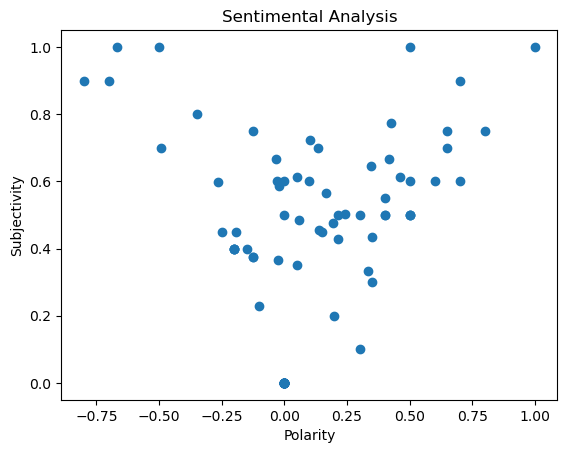

In [68]:
#plot the polarity and subjectivity analysis of the tweet
plt.scatter(x=tweet['Polarity'], y=tweet['Subjectivity'])
plt.title('Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

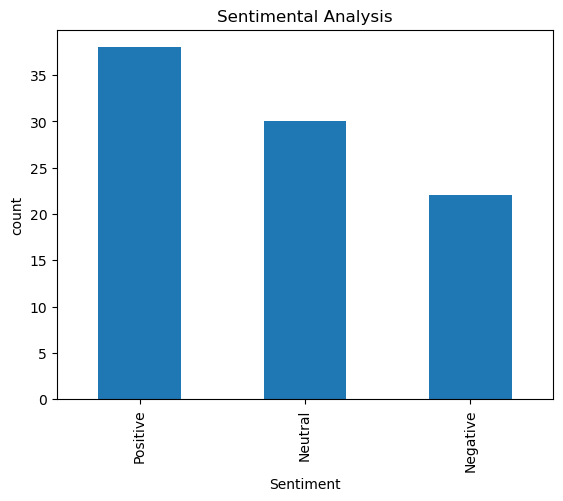

In [69]:
#display the value count
tweet['Analysis'].value_counts()

#visualizing tweet sentiment count with bar plot
plt.title('Sentimental Analysis')
plt.xlabel('Sentiment')
plt.ylabel('count')
tweet['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [70]:
tweet.to_csv(r'C:\Users\USER\Downloads\tweets_clean.csv', index = False)
pd.read_csv(r'C:\Users\USER\Downloads\tweets_clean.csv')

,Date Created,Number of Likes,Source of Tweet,Tweet,Number of Retweets,year,sentiment,Subjectivity,Polarity,Analysis
0,2023-02-27,41194,Twitter for iPhone,is there any other way to be?,3181,2023,Negative,0.37500,-0.12500,Negative
1,2023-01-06,19234,Twitter Web App,I prefer screams of agony.,926,2023,Neutral,0.00000,0.00000,Neutral
2,2023-01-06,133591,Twitter Media Studio,More torture is coming. Lucky you.,22806,2023,Positive,0.66667,0.41667,Positive
3,2023-01-06,123,Twitter for iPhone,Indeed,0,2023,Neutral,0.00000,0.00000,Neutral
4,2023-01-03,16833,Twitter Web App,Your daughters are correct. As the saying goes...,673,2023,Positive,0.10000,0.30000,Positive
5,2022-12-07,25519,Twitter Web App,,1797,2022,Neutral,0.00000,0.00000,Neutral
6,2022-12-04,8598,Twitter for iPhone,I started this account because Thing told me ...,888,2022,Positive,0.61190,0.46190,Positive
7,2022-12-04,6980,Twitter for iPhone,"Coincidentally, bend and snap is also the most...",451,2022,Positive,0.50000,0.50000,Positive
8,2022-12-04,21749,Twitter Media Studio,Eugene is looking for new recruits to join the...,4724,2022,Positive,0.47727,0.19318,Positive
9,2022-12-03,18842,Twitter Media Studio,I love to start my weekends with a good blood ...,1628,2022,Positive,0.60000,0.60000,Positive


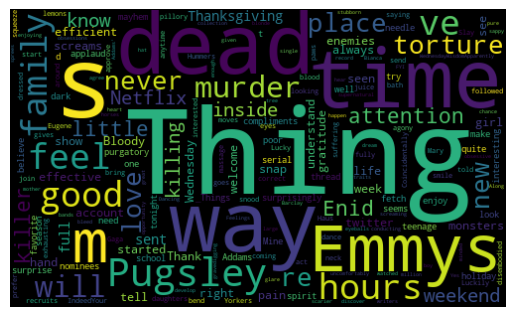

In [71]:
#plotting tweet WordCloud

allwords = ''.join( [twts for twts in tweet['Tweet']] ) 
wordCloud = WordCloud(width=500, height=300, random_state= 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()